# Detecting Missing Values

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('weather_m4.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
YYYYMMDD           8784 non-null int64
TIME               8784 non-null int64
TEMP               8784 non-null int64
MIN_TEMP_GROUND    1464 non-null float64
PRESSURE           8784 non-null int64
HUMIDITY           8784 non-null int64
VIEW_RANGE         8743 non-null float64
CLOUD              8743 non-null float64
MIST               8741 non-null float64
RAIN               8741 non-null float64
SNOW               8741 non-null float64
THUNDER            8741 non-null float64
ICE                8741 non-null float64
WEATHER_CODE       3862 non-null float64
dtypes: float64(9), int64(5)
memory usage: 960.8 KB


In [2]:
df[['MIN_TEMP_GROUND', 'VIEW_RANGE', 'CLOUD', 'WEATHER_CODE']].head(15)

,MIN_TEMP_GROUND,VIEW_RANGE,CLOUD,WEATHER_CODE
0,NaN,56.0,4.0,10.0
1,NaN,57.0,2.0,10.0
2,NaN,56.0,7.0,23.0
3,NaN,57.0,7.0,51.0
4,NaN,56.0,7.0,22.0
5,3.0,9.0,0.0,34.0
6,NaN,5.0,0.0,34.0
7,NaN,1.0,0.0,34.0
8,NaN,2.0,0.0,32.0
9,NaN,5.0,0.0,32.0


In [3]:
# Show all columns with null values
df.isnull().any()

YYYYMMDD           False
TIME               False
TEMP               False
MIN_TEMP_GROUND     True
PRESSURE           False
HUMIDITY           False
VIEW_RANGE          True
CLOUD               True
MIST                True
RAIN                True
SNOW                True
THUNDER             True
ICE                 True
WEATHER_CODE        True
dtype: bool

In [4]:
# Show all rows with null values
df[df.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,1,68,NaN,10207,87,56.0,4.0,0.0,0.0,0.0,0.0,0.0,10.0
1,20160101,2,58,NaN,10214,92,57.0,2.0,0.0,0.0,0.0,0.0,0.0,10.0
2,20160101,3,57,NaN,10220,92,56.0,7.0,0.0,1.0,0.0,0.0,0.0,23.0
3,20160101,4,60,NaN,10225,93,57.0,7.0,0.0,1.0,0.0,0.0,0.0,51.0
4,20160101,5,45,NaN,10230,95,56.0,7.0,0.0,1.0,0.0,0.0,0.0,22.0
6,20160101,7,11,NaN,10242,99,5.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
7,20160101,8,7,NaN,10245,100,1.0,0.0,1.0,0.0,0.0,0.0,1.0,34.0
8,20160101,9,2,NaN,10248,99,2.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0
9,20160101,10,20,NaN,10249,100,5.0,0.0,1.0,0.0,0.0,0.0,0.0,32.0
10,20160101,11,72,NaN,10245,88,64.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0


In [5]:
# Are there any rows with only null values?
df.isnull().all(axis=1).any()

False

In [6]:
# Are there any columns with no null values at all?
df.notnull().all()

YYYYMMDD            True
TIME                True
TEMP                True
MIN_TEMP_GROUND    False
PRESSURE            True
HUMIDITY            True
VIEW_RANGE         False
CLOUD              False
MIST               False
RAIN               False
SNOW               False
THUNDER            False
ICE                False
WEATHER_CODE       False
dtype: bool

In [7]:
# Hmm.. seems like this column only has a value every 6th row.. let's check this
df['MIN_TEMP_GROUND']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        3.0
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11     -17.0
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17      47.0
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23      47.0
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29      48.0
        ... 
8754     NaN
8755     NaN
8756     NaN
8757     NaN
8758     NaN
8759    32.0
8760     NaN
8761     NaN
8762     NaN
8763     NaN
8764     NaN
8765    29.0
8766     NaN
8767     NaN
8768     NaN
8769     NaN
8770     NaN
8771    29.0
8772     NaN
8773     NaN
8774     NaN
8775     NaN
8776     NaN
8777    37.0
8778     NaN
8779     NaN
8780     NaN
8781     NaN
8782     NaN
8783    26.0
Name: MIN_TEMP_GROUND, Length: 8784, dtype: float64

In [8]:
# Create a series containing indices for every 6th row
every_6th_row = pd.Series(range(5, len(df), 6))

In [9]:
# Are all these rows NOT null?
df['MIN_TEMP_GROUND'][every_6th_row].notnull().all()

True

In [10]:
# Are all other rows null?
# Q: Can you rewrite this line to use df.loc?
df['MIN_TEMP_GROUND'].drop(every_6th_row).isnull().all()

True

# Handling Missing Values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 14 columns):
YYYYMMDD           8784 non-null int64
TIME               8784 non-null int64
TEMP               8784 non-null int64
MIN_TEMP_GROUND    1464 non-null float64
PRESSURE           8784 non-null int64
HUMIDITY           8784 non-null int64
VIEW_RANGE         8743 non-null float64
CLOUD              8743 non-null float64
MIST               8741 non-null float64
RAIN               8741 non-null float64
SNOW               8741 non-null float64
THUNDER            8741 non-null float64
ICE                8741 non-null float64
WEATHER_CODE       3862 non-null float64
dtypes: float64(9), int64(5)
memory usage: 960.8 KB


In [12]:
# df.drop can be used to remove columns and/or rows
df.drop(columns='WEATHER_CODE', inplace=True)

In [13]:
# We can use fillna() to fill in missing data based on the data that is present
df['MIN_TEMP_GROUND'].fillna(method='bfill', inplace=True)

In [14]:
# Now that we have no more nulls in MIN_TEMP_GROUND
# what are the dates where missing values occur?
df.loc[df.isnull().any(axis=1), 'YYYYMMDD'].drop_duplicates()

5306    20160809
5596    20160821
5616    20160822
Name: YYYYMMDD, dtype: int64

In [15]:
# Shortest solution: Just drop everything
nulls_dropped = df.dropna()
nulls_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 0 to 8783
Data columns (total 13 columns):
YYYYMMDD           8741 non-null int64
TIME               8741 non-null int64
TEMP               8741 non-null int64
MIN_TEMP_GROUND    8741 non-null float64
PRESSURE           8741 non-null int64
HUMIDITY           8741 non-null int64
VIEW_RANGE         8741 non-null float64
CLOUD              8741 non-null float64
MIST               8741 non-null float64
RAIN               8741 non-null float64
SNOW               8741 non-null float64
THUNDER            8741 non-null float64
ICE                8741 non-null float64
dtypes: float64(8), int64(5)
memory usage: 956.0 KB


In [16]:
# But note that our index is now discontinuous
nulls_dropped[5300:5310]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5300,20160808,21,131,124.0,10211,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5301,20160808,22,133,124.0,10209,97,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5302,20160808,23,135,124.0,10209,96,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5303,20160808,24,136,124.0,10208,94,65.0,8.0,0.0,0.0,0.0,0.0,0.0
5304,20160809,1,141,95.0,10205,89,70.0,8.0,0.0,0.0,0.0,0.0,0.0
5305,20160809,2,123,95.0,10199,92,65.0,1.0,0.0,0.0,0.0,1.0,0.0
5318,20160809,15,143,135.0,10234,85,59.0,8.0,0.0,1.0,0.0,0.0,0.0
5319,20160809,16,160,135.0,10231,65,80.0,2.0,0.0,1.0,0.0,0.0,0.0
5320,20160809,17,156,135.0,10231,62,80.0,0.0,0.0,0.0,0.0,0.0,0.0
5321,20160809,18,140,135.0,10227,72,75.0,1.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Another idea: just drop rows that have less than 7 columns filled
# This leaves us with only two rows that contain null values
drop_thresh = df.dropna(thresh=7)
drop_thresh[drop_thresh.isnull().any(axis=1)]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5317,20160809,14,167,135.0,10233,65,80.0,2.0,NaN,NaN,NaN,NaN,NaN
5626,20160822,11,193,175.0,10233,88,65.0,8.0,NaN,NaN,NaN,NaN,NaN


In [18]:
# Or let's just look at the missing data again..
rows_to_fill = df.isnull().any(axis=1)
df[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,20160809,4,107,95.0,10206,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,20160809,5,104,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,20160809,6,115,95.0,10210,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,20160809,7,125,110.0,10211,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,20160809,8,144,110.0,10217,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,20160809,9,148,110.0,10222,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,20160809,10,156,110.0,10228,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,20160809,11,153,110.0,10230,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5315,20160809,12,161,110.0,10231,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# We might fill all null values with the mean of the corresponding column
nulls_filled = df.fillna(df.mean())

In [20]:
# Let's look at the result
nulls_filled[rows_to_fill]

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE
5306,20160809,3,115,95.0,10207,90,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5307,20160809,4,107,95.0,10206,93,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5308,20160809,5,104,95.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5309,20160809,6,115,95.0,10210,80,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5310,20160809,7,125,110.0,10211,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5311,20160809,8,144,110.0,10217,75,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5312,20160809,9,148,110.0,10222,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5313,20160809,10,156,110.0,10228,70,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5314,20160809,11,153,110.0,10230,65,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016
5315,20160809,12,161,110.0,10231,60,61.916962,5.476267,0.072989,0.20318,0.001602,0.007093,0.016016


In [21]:
# Or you could fill the null values with the mode
df.fillna(df.mode().iloc[0], inplace=True)

# Removing Outliers

In [22]:
athletes = pd.read_csv('athletes.csv')
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11543 entries, 0 to 11542
Data columns (total 9 columns):
id             11543 non-null int64
nationality    11543 non-null object
sex            11543 non-null object
height         11213 non-null float64
weight         10884 non-null float64
sport          11543 non-null object
gold           11543 non-null object
silver         11543 non-null object
bronze         11543 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 811.7+ KB


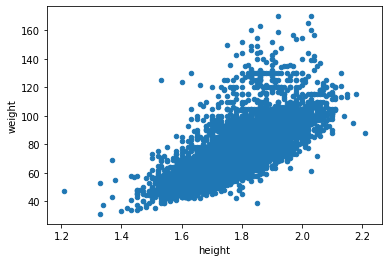

In [23]:
%matplotlib inline
athletes.plot.scatter(x='height', y='weight')

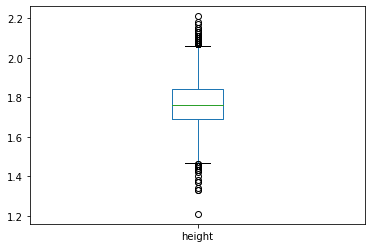

In [24]:
heights = athletes['height']
heights.plot.box()

In [25]:
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1 
pmin = q1 - 1.5 * iqr
pmax = q3 + 1.5 * iqr
nwh = heights.where(heights.between(pmin, pmax))

,before,after
count,11213.000000,11121.000000
mean,1.766294,1.765098
std,0.112702,0.108867
min,1.210000,1.470000
25%,1.690000,1.690000
50%,1.760000,1.760000
75%,1.840000,1.840000
max,2.210000,2.060000


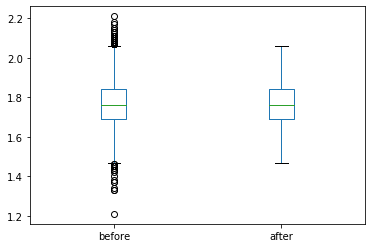

In [26]:
compare = pd.DataFrame({'before':heights, 'after':nwh})
compare.plot.box()
compare.describe()

In [27]:
heights.where(heights.between(pmin, pmax), inplace=True)

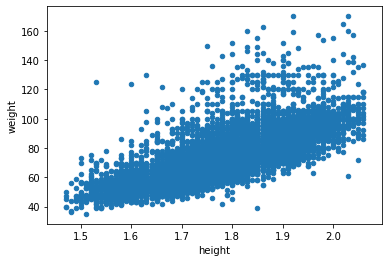

In [28]:
athletes.plot.scatter(x='height', y='weight')

# Removing Duplicates

In [29]:
athletes.duplicated().any()

True

In [30]:
athletes[athletes.duplicated()]

,id,nationality,sex,height,weight,sport,gold,silver,bronze
3224,277821751,RUS,female,1.76,67.0,aquatics,0,0,1
3813,96493170,GER,male,1.82,78.0,football,0,1,0
5676,891867859,USA,male,1.88,86.0,athletics,1,0,0
9695,848761398,COL,male,1.70,61.0,cycling,0,0,0
10774,1152723,GRE,female,1.81,70.0,fencing,0,0,0


In [31]:
athletes.drop_duplicates(inplace=True)

In [32]:
athletes['nationality'].drop_duplicates().sort_values()

51      AFG
1630    ALB
27      ALG
3161    AND
275     ANG
1859    ANT
127     ARG
579     ARM
543     ARU
1438    ASA
5       AUS
378     AUT
53      AZE
123     BAH
56      BAN
239     BAR
69      BDI
380     BEL
1869    BEN
1715    BER
5468    BHU
609     BIH
1584    BIZ
329     BLR
883     BOL
1298    BOT
79      BRA
11      BRN
4689    BRU
305     BUL
       ... 
3233    SUR
411     SVK
49      SWE
8678    SWZ
1288    SYR
554     TAN
627     TGA
582     THA
715     TJK
596     TKM
1248    TLS
137     TOG
198     TPE
832     TTO
141     TUN
191     TUR
3170    TUV
475     UAE
1429    UGA
328     UKR
299     URU
6       USA
16      UZB
1534    VAN
194     VEN
4198    VIE
1589    VIN
7699    YEM
1440    ZAM
831     ZIM
Name: nationality, Length: 207, dtype: object

In [33]:
athletes['nationality'].value_counts()

USA    567
BRA    485
GER    441
AUS    431
FRA    410
CHN    404
GBR    374
JPN    346
CAN    321
ESP    313
ITA    312
RUS    286
NED    249
POL    242
ARG    223
KOR    213
NZL    208
UKR    205
SWE    164
COL    154
HUN    154
RSA    146
DEN    128
MEX    126
BLR    124
IND    123
CUB    123
EGY    122
BEL    108
CZE    104
      ... 
COD      4
GAM      4
SLE      4
IVB      4
COM      4
VIN      4
OMA      4
ASA      4
MDV      4
YEM      3
SOL      3
BRU      3
MON      3
BIZ      3
LIE      3
KIR      3
STP      3
TLS      3
AFG      3
SSD      3
CHA      2
SWZ      2
BHU      2
MTN      2
GEQ      2
LBR      2
DMA      2
SOM      2
NRU      2
TUV      1
Name: nationality, Length: 207, dtype: int64

In [34]:
athletes['sex'].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

# Converting Types

In [35]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
id             11538 non-null int64
nationality    11538 non-null object
sex            11538 non-null object
height         11116 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null object
silver         11538 non-null object
bronze         11538 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 901.4+ KB


In [36]:
athletes[['gold', 'silver', 'bronze']].head()

,gold,silver,bronze
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [37]:
athletes[athletes['gold'] == 'O']

,id,nationality,sex,height,weight,sport,gold,silver,bronze
7521,666617738,RUS,male,1.71,72.0,canoe,O,O,O


In [38]:
athletes.loc[7521, ['gold', 'silver', 'bronze']] = 0

In [39]:
athletes[['gold', 'silver', 'bronze']] = athletes[['gold', 'silver', 'bronze']].astype(int)

In [40]:
athletes[['gold', 'silver', 'bronze']].sum()

gold      666
silver    655
bronze    704
dtype: int64

In [41]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 11542
Data columns (total 9 columns):
id             11538 non-null int64
nationality    11538 non-null object
sex            11538 non-null object
height         11116 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


# Fixing Indexes

In [42]:
athletes.head()

,id,nationality,sex,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [43]:
athletes.set_index('id', drop=True, inplace=True)
athletes.head()

,nationality,sex,height,weight,sport,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [44]:
athletes.rename(
    columns={"nationality": "country", "sport": "discipline"}, 
    inplace=True)
athletes.head()

,country,sex,height,weight,discipline,gold,silver,bronze
id,,,,,,,,
736041664,ESP,male,1.72,64.0,athletics,0,0,0
532037425,KOR,female,1.68,56.0,fencing,0,0,0
435962603,CAN,male,1.98,79.0,athletics,0,0,1
521041435,MDA,male,1.83,80.0,taekwondo,0,0,0
33922579,NZL,male,1.81,71.0,cycling,0,0,0


In [45]:
df = pd.read_csv('weather_m4.csv')

In [46]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 5 to 8783
Data columns (total 14 columns):
YYYYMMDD           831 non-null int64
TIME               831 non-null int64
TEMP               831 non-null int64
MIN_TEMP_GROUND    831 non-null float64
PRESSURE           831 non-null int64
HUMIDITY           831 non-null int64
VIEW_RANGE         831 non-null float64
CLOUD              831 non-null float64
MIST               831 non-null float64
RAIN               831 non-null float64
SNOW               831 non-null float64
THUNDER            831 non-null float64
ICE                831 non-null float64
WEATHER_CODE       831 non-null float64
dtypes: float64(9), int64(5)
memory usage: 97.4 KB


In [47]:
df.head()

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
5,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
11,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
17,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
29,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
35,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0


In [48]:
df.reset_index(drop=True)

,YYYYMMDD,TIME,TEMP,MIN_TEMP_GROUND,PRESSURE,HUMIDITY,VIEW_RANGE,CLOUD,MIST,RAIN,SNOW,THUNDER,ICE,WEATHER_CODE
0,20160101,6,20,3.0,10237,99,9.0,0.0,1.0,0.0,0.0,0.0,0.0,34.0
1,20160101,12,79,-17.0,10239,84,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,20160101,18,49,47.0,10194,98,17.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
3,20160102,6,53,48.0,10089,88,62.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
4,20160102,12,63,47.0,10071,94,57.0,8.0,0.0,0.0,0.0,0.0,0.0,10.0
5,20160102,24,73,64.0,10040,98,39.0,8.0,0.0,1.0,0.0,0.0,0.0,62.0
6,20160103,6,88,71.0,10025,96,47.0,8.0,0.0,1.0,0.0,0.0,0.0,23.0
7,20160103,12,78,71.0,10005,83,70.0,8.0,0.0,1.0,0.0,0.0,0.0,23.0
8,20160103,18,60,56.0,9929,89,69.0,8.0,0.0,1.0,0.0,0.0,0.0,57.0
9,20160103,24,53,50.0,9875,91,65.0,8.0,0.0,1.0,0.0,0.0,0.0,61.0
